In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd 'drive/My Drive'

/content/drive/My Drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
x=df[['math score','reading score','writing score']]

In [7]:
x.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [8]:
len(x)

1000

In [9]:
x.isna().sum()

math score       0
reading score    0
writing score    0
dtype: int64

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     1000 non-null   int64
 1   reading score  1000 non-null   int64
 2   writing score  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [11]:
x.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
x=np.array(x)

K Means Clustering

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


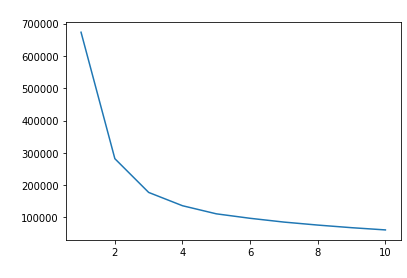

In [19]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method",fontdict={'color':"white"})
plt.ylabel("WCSS",fontdict={'color':"white"})
plt.xlabel("Number of Clusters",fontdict={'color':"white"})
plt.show()

In [20]:
#Applying the Optimum Number of of Clusters
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit_predict(x)

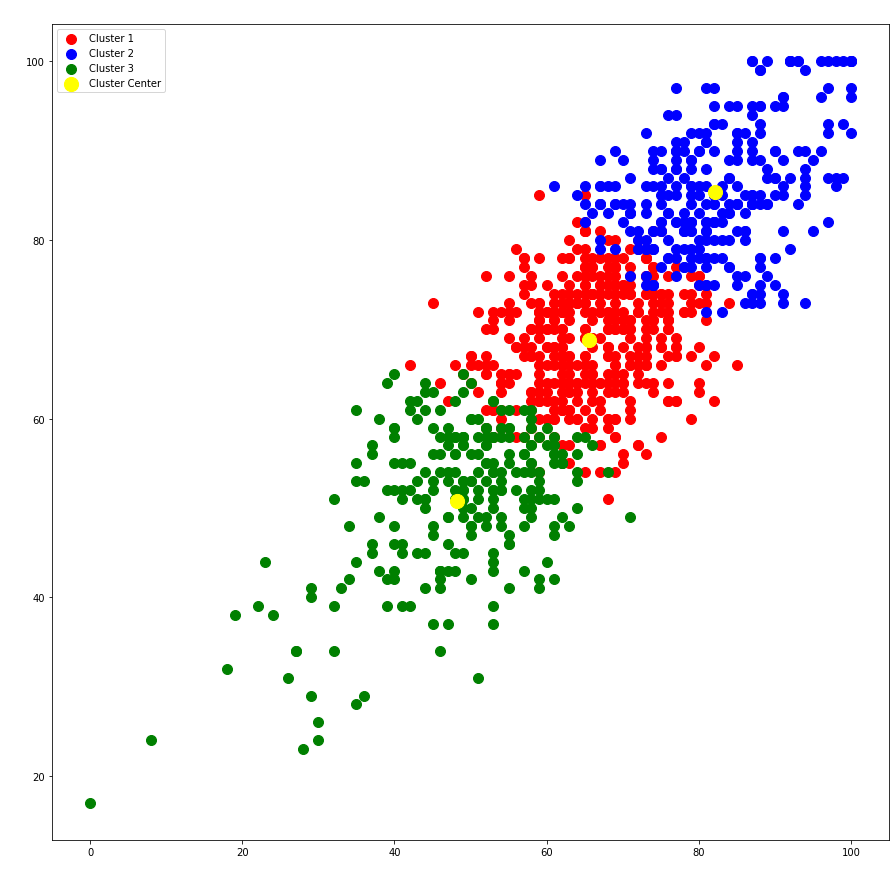

In [28]:
#Visualizing the clusters
plt.figure(figsize=(15,15))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Cluster Center')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Reading Score",fontdict={'color':'white','size':15})
plt.xlabel('Maths Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

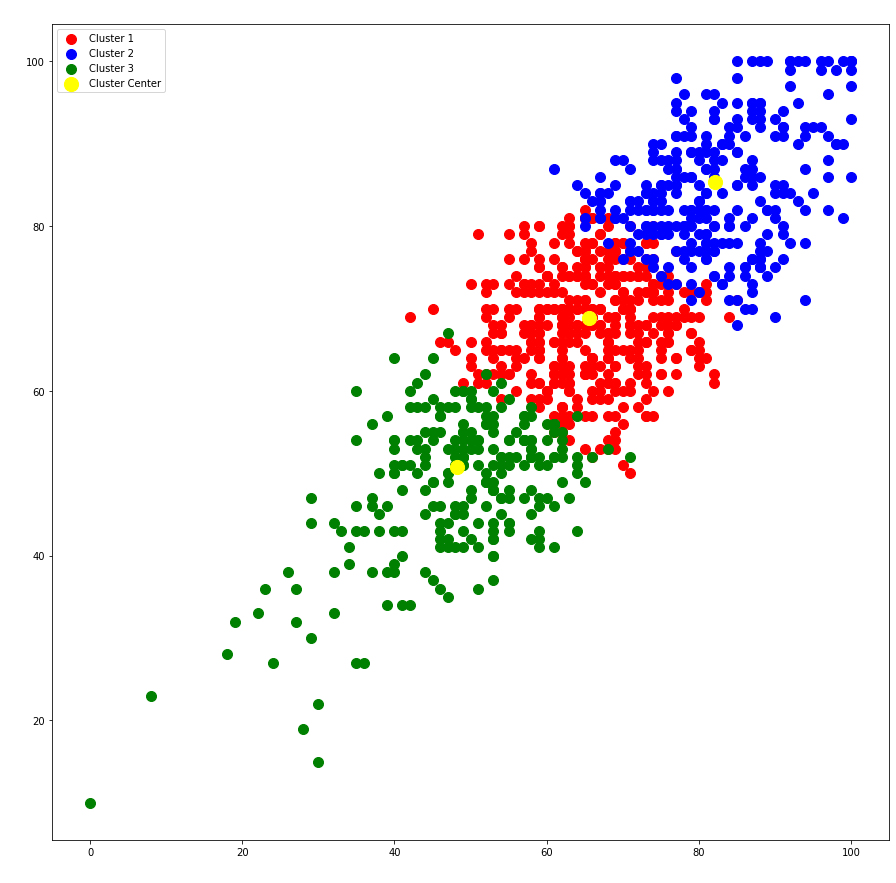

In [29]:
plt.figure(figsize=(15,15))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,2],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,2],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Cluster Center')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Writing Score",fontdict={'color':'white','size':15})
plt.xlabel('Maths Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

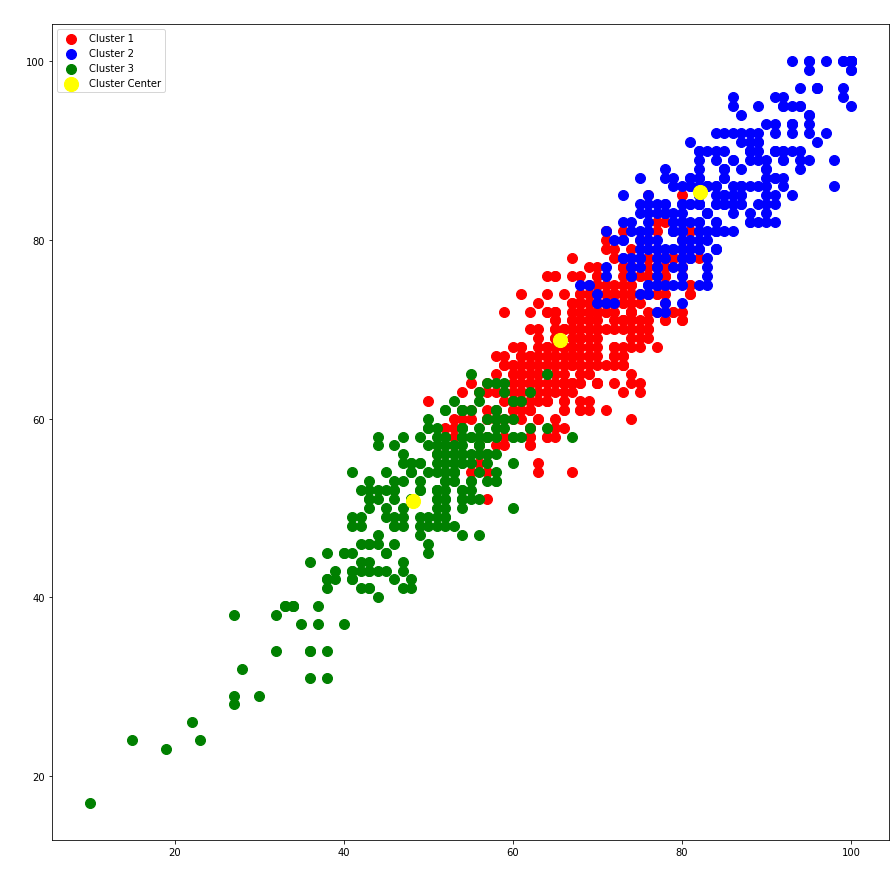

In [30]:
plt.figure(figsize=(15,15))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Cluster Center')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Reading Score",fontdict={'color':'white','size':15})
plt.xlabel('Writing Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

Hierarchical Clustering

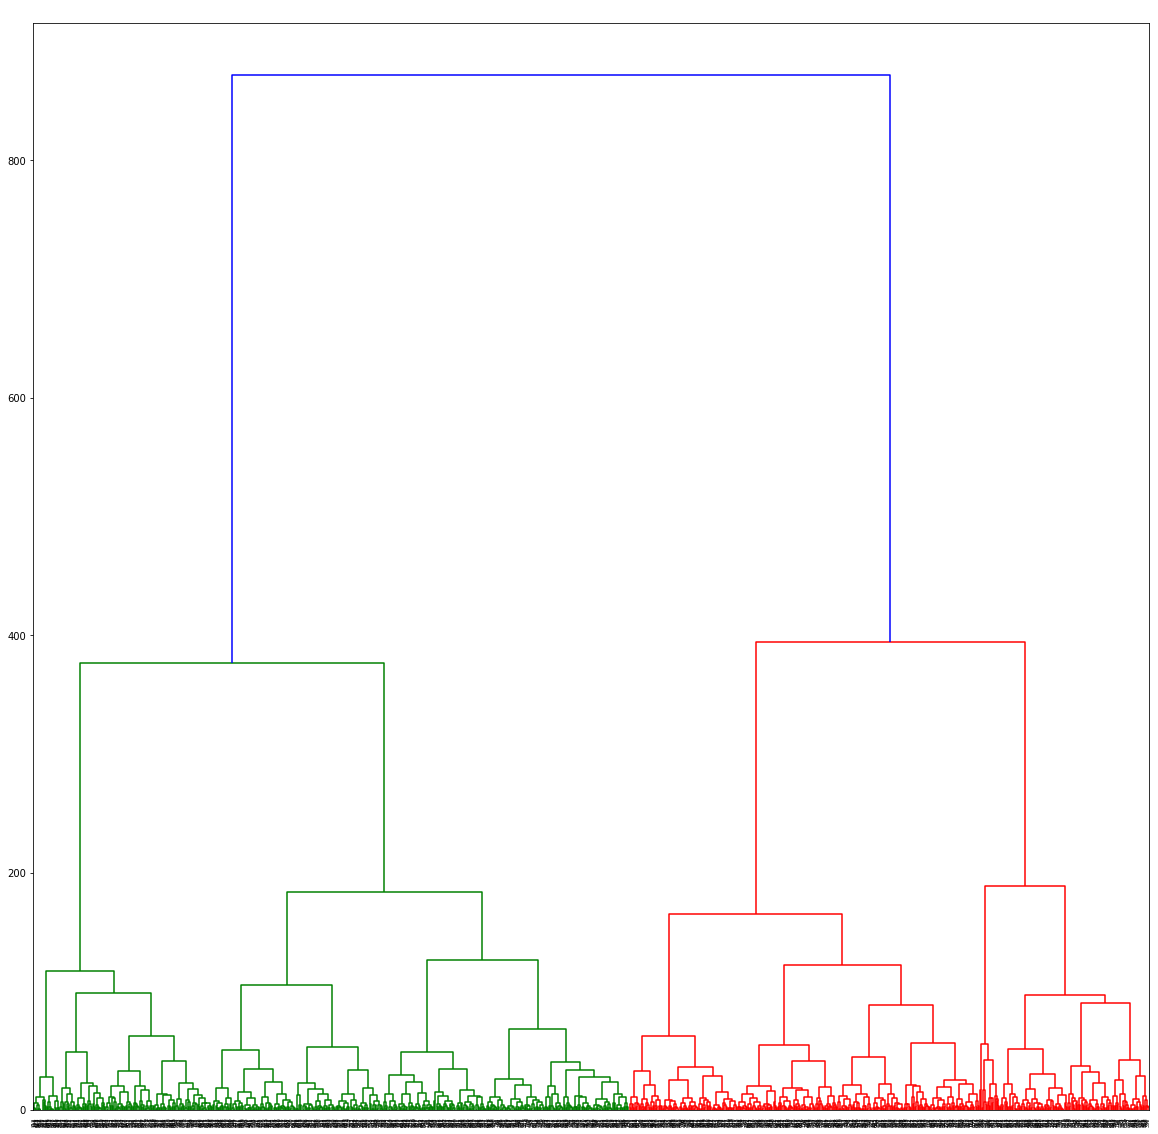

In [35]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram',fontdict={'color':'white'})
plt.show()
 

In [37]:
#Fitting with the optimal number of CLusters
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=4)
y_hc=agc.fit_predict(x)


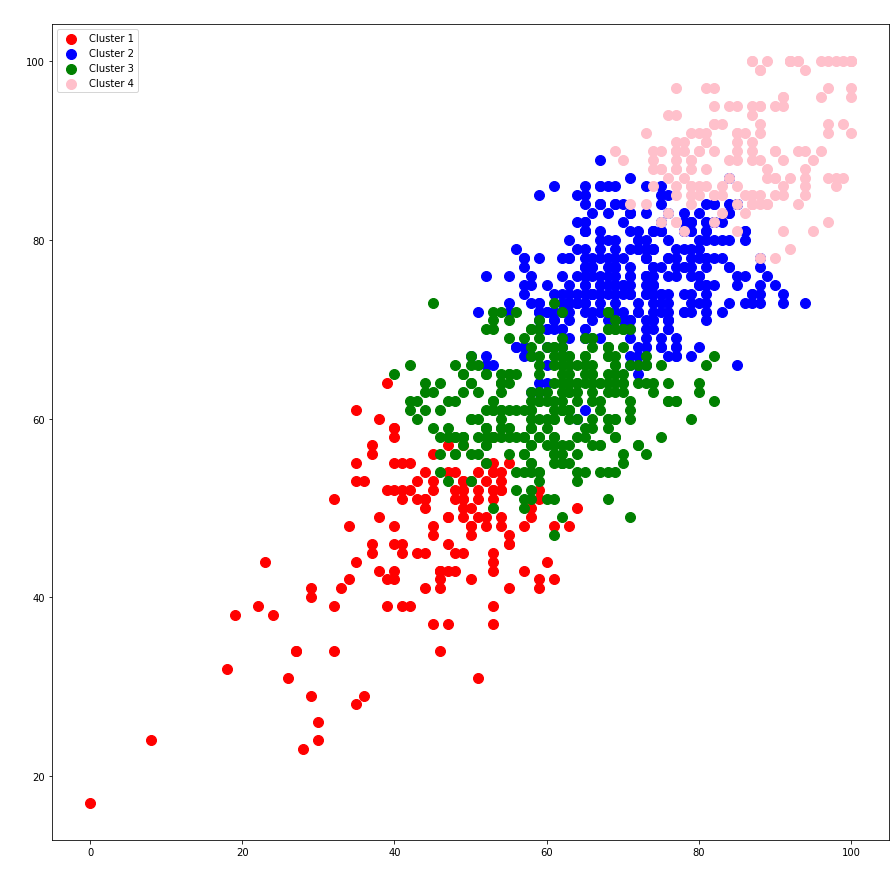

In [43]:
#Visualizing the results
plt.figure(figsize=(15,15))
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='pink',label='Cluster 4')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Reading Score",fontdict={'color':'white','size':15})
plt.xlabel('Maths Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

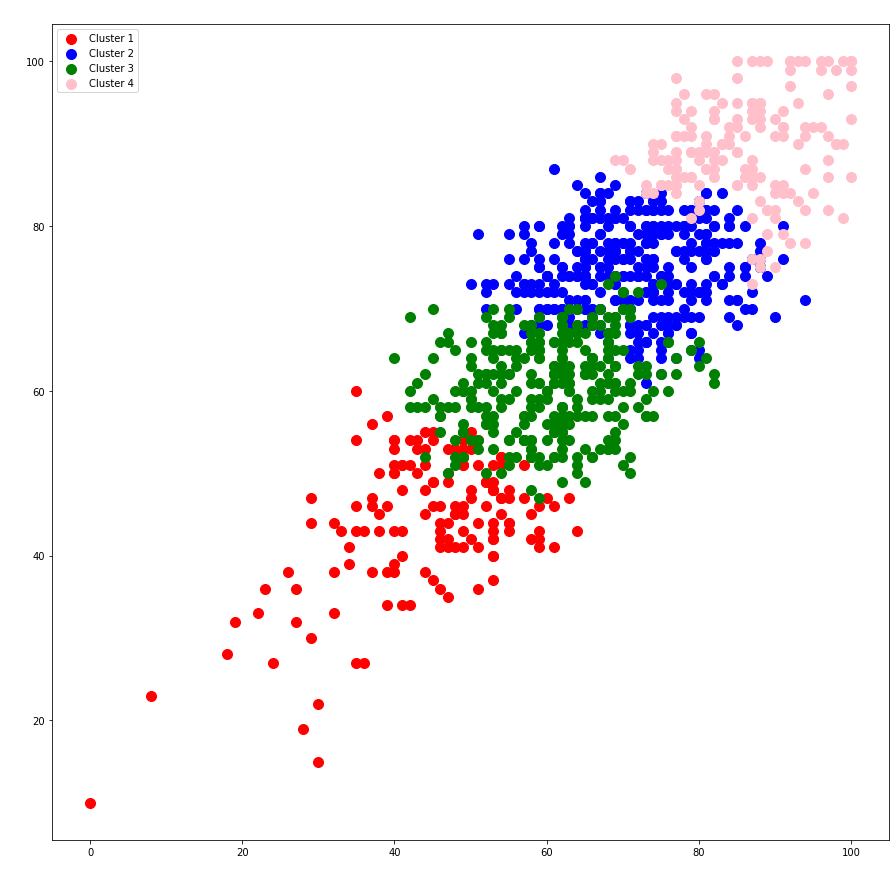

In [44]:
plt.figure(figsize=(15,15))
plt.scatter(x[y_hc==0,0],x[y_hc==0,2],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_hc==1,0],x[y_hc==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,2],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,2],s=100,c='pink',label='Cluster 4')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Writing Score",fontdict={'color':'white','size':15})
plt.xlabel('Maths Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

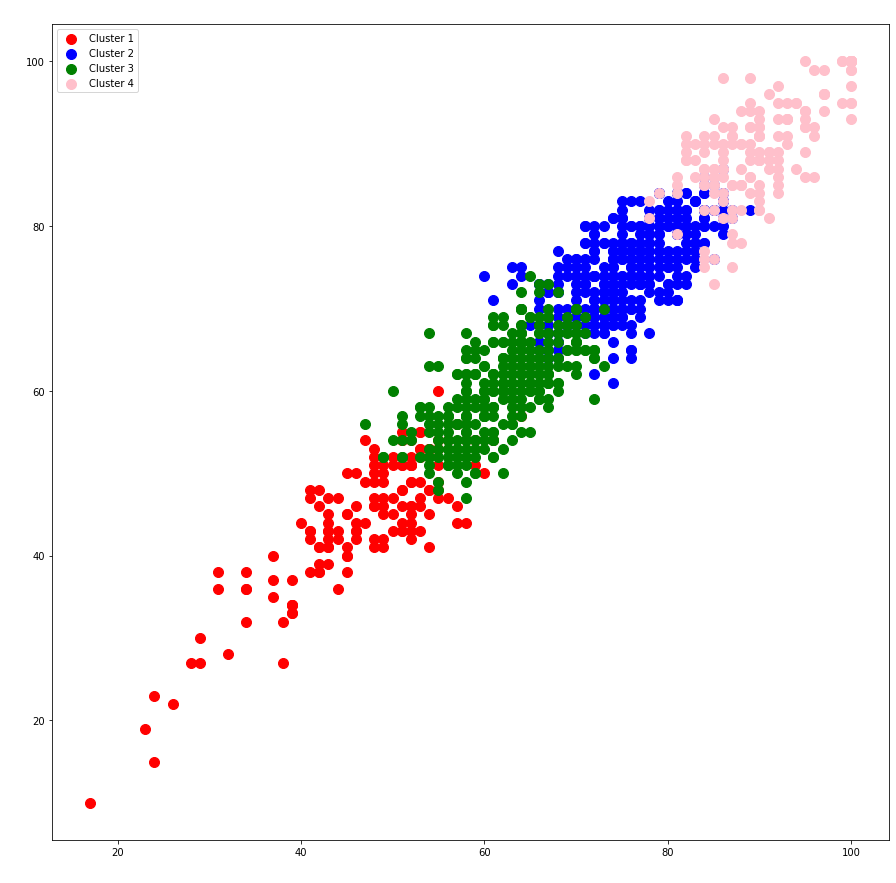

In [45]:
plt.figure(figsize=(15,15))
plt.scatter(x[y_hc==0,1],x[y_hc==0,2],s=100,c='red',label='Cluster 1',)
plt.scatter(x[y_hc==1,1],x[y_hc==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2,1],x[y_hc==2,2],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_hc==3,1],x[y_hc==3,2],s=100,c='pink',label='Cluster 4')
plt.title("Students Cluster",fontdict={'color':'white','size':15})
plt.ylabel("Writing Score",fontdict={'color':'white','size':15})
plt.xlabel('Reading Score',fontdict={'color':'white','size':15})
plt.legend()
plt.show()

DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=4,metric='euclidean',min_samples=11)

In [64]:
y_db=dbscan.fit(x)

In [65]:
y_db.labels_

array([ 0, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  3,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  2,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,
       -1,  0,  0, -1,  0

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)

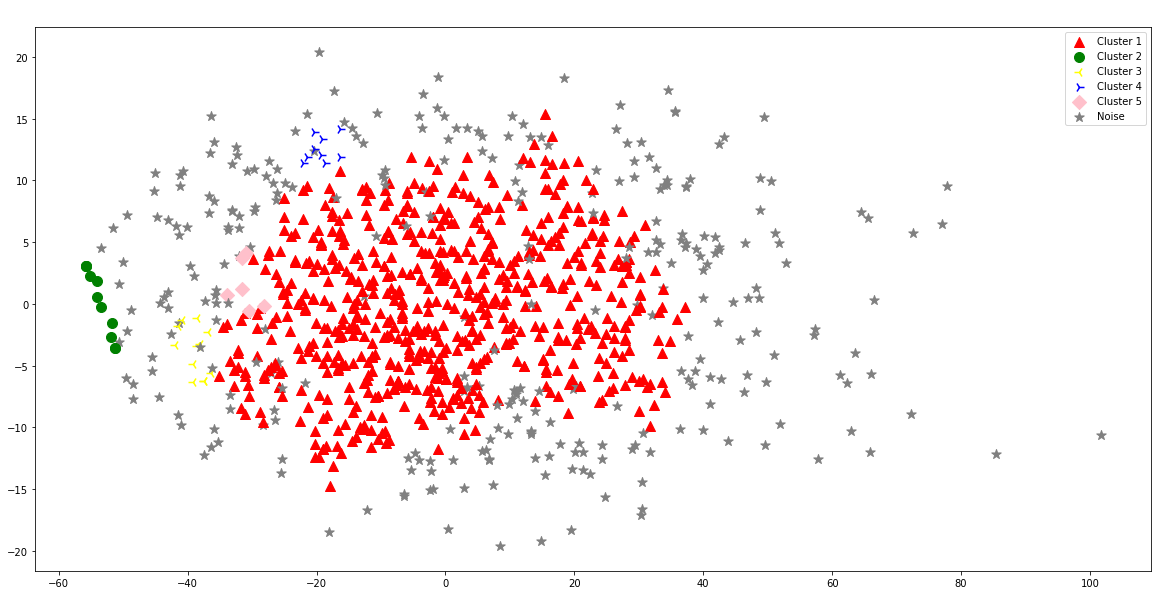

In [75]:
plt.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='yellow', marker='3')
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='blue', marker='4')
    elif dbscan.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='pink', marker='D')
    elif dbscan.labels_[i] == -1:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='grey',marker='*')
plt.legend([c1, c2, c3, c4, c5, c6], ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Noise'])
plt.title('DBSCAN Clustering',fontdict={'color':'white','size':20})
plt.show()
    